In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns

In [17]:
df=pd.read_csv("languages.csv")

In [18]:
df.head()

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german


In [19]:
df.tail()

,text,language
763679,its so noisy here i cant hear myself think,english
763680,i was born before you,english
763681,i promise ill be quiet,english
763682,this isnt french,english
763683,tom sought shelter from the rain,english


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763684 entries, 0 to 763683
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      763684 non-null  object
 1   language  763684 non-null  object
dtypes: object(2)
memory usage: 11.7+ MB


In [21]:
df.isnull().sum()

text        0
language    0
dtype: int64

In [22]:
df['language'].value_counts()

english    275687
german     199618
french     169693
spanish    118686
Name: language, dtype: int64


Distribution of dataset
english    0.360996
german     0.261388
french     0.222203
spanish    0.155412
Name: language, dtype: float64

Plot


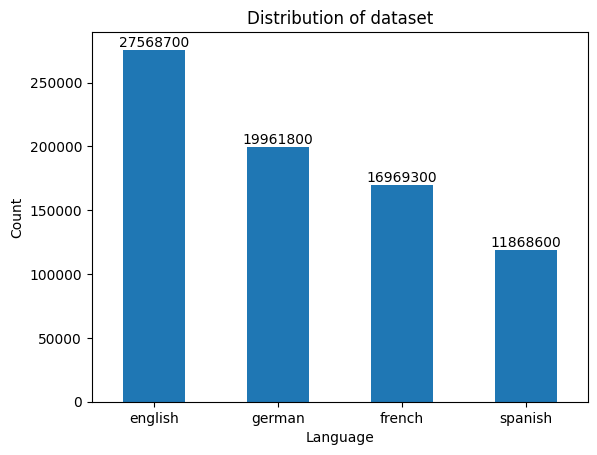

In [23]:
# providing the distribution of the dataset
print("\nDistribution of dataset")
print(df.language.value_counts(normalize=True))

print("\nPlot")
df.language.value_counts().plot(kind="bar")
plt.xlabel('Language')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of dataset')

for i, v in enumerate(df['language'].value_counts()):
    plt.annotate(str(v*100), xy=(i, v), ha='center', va='bottom')

# Display the plot
plt.show()

In [24]:

def tokenize_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    clean = re.compile('<.*?>')
    text=text.lower()
    text=re.sub(clean, "", text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # joining tokens
    tokens = [word for word in tokens]
    ans=' '.join(tokens)
    return ans

In [25]:
# applying the optimized stemming function to the content
df['content'] = df['text'].apply(tokenize_text)

In [26]:
df['content']

0         ich denke es handelt sich hier um ein missvers...
1                        ich habe tom gerade erst verlassen
2                           tom versuchte mary nur zu rgern
3                              tom hat mir die hand gek sst
4                           ich wusste dass dir das gefiele
                                ...                        
763679           its so noisy here i cant hear myself think
763680                                i was born before you
763681                               i promise ill be quiet
763682                                     this isnt french
763683                     tom sought shelter from the rain
Name: content, Length: 763684, dtype: object

In [27]:
# filter for positive news
english_data = df[df["language"] == 'english']
german_data=df[df['language'] == 'german']
french_data=df[df['language'] == 'french']
spanish_data=df[df['language'] == 'spanish']

In [28]:
# function for making a word cloud representing the frequency of words used
def make_wordcloud(df,heading):
    content= ' '.join(df['content'].tolist())
    wordcloud = WordCloud().generate(content)
    fig= plt.figure(figsize=(10,10))
    plt.title("Word Cloud for {} language".format(heading))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

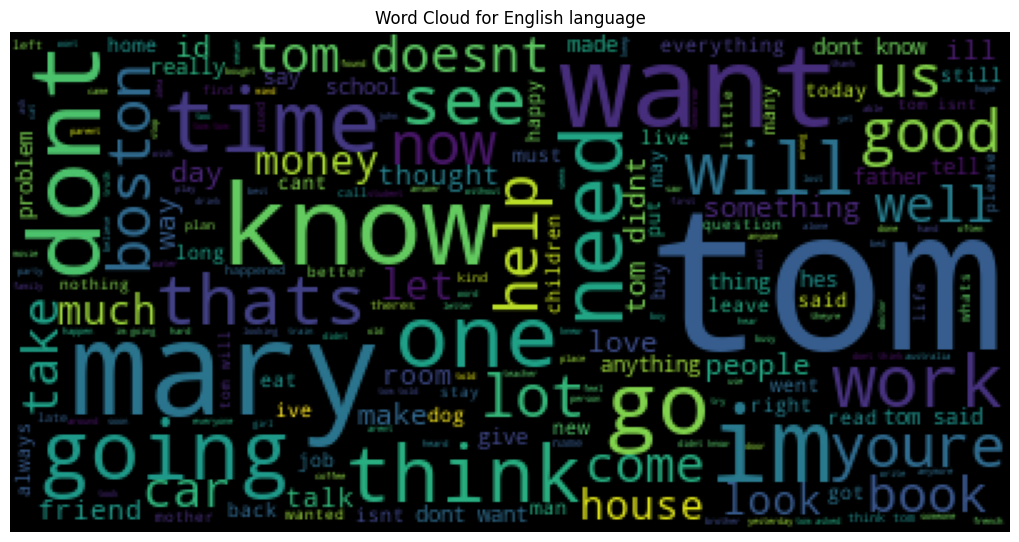

In [29]:
make_wordcloud(english_data,"English")

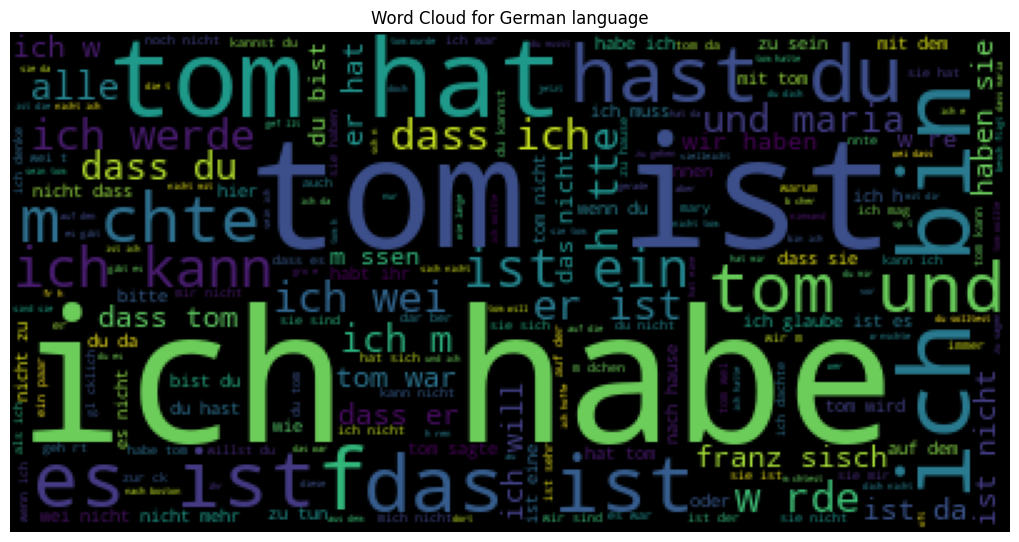

In [30]:
make_wordcloud(german_data,"German")

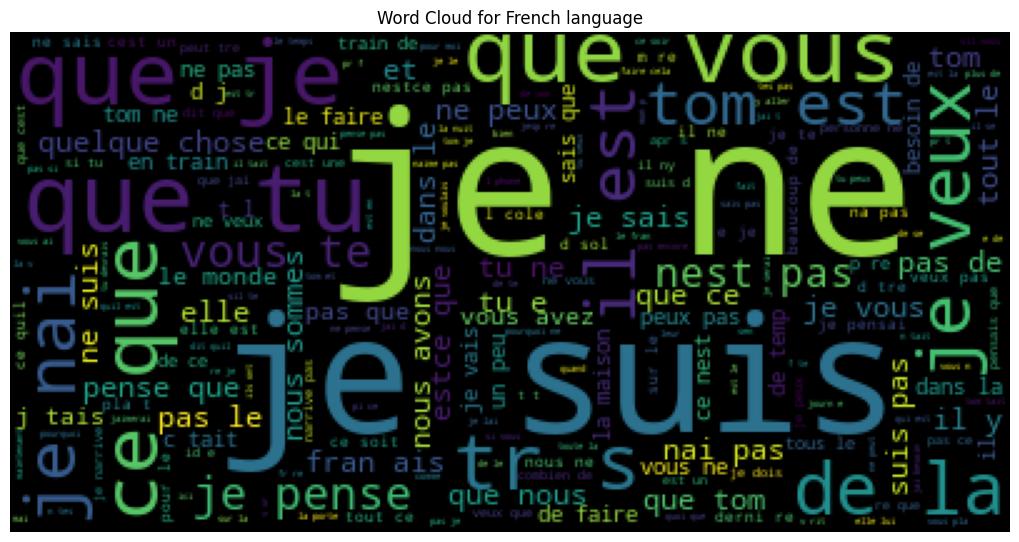

In [31]:
make_wordcloud(french_data,"French")

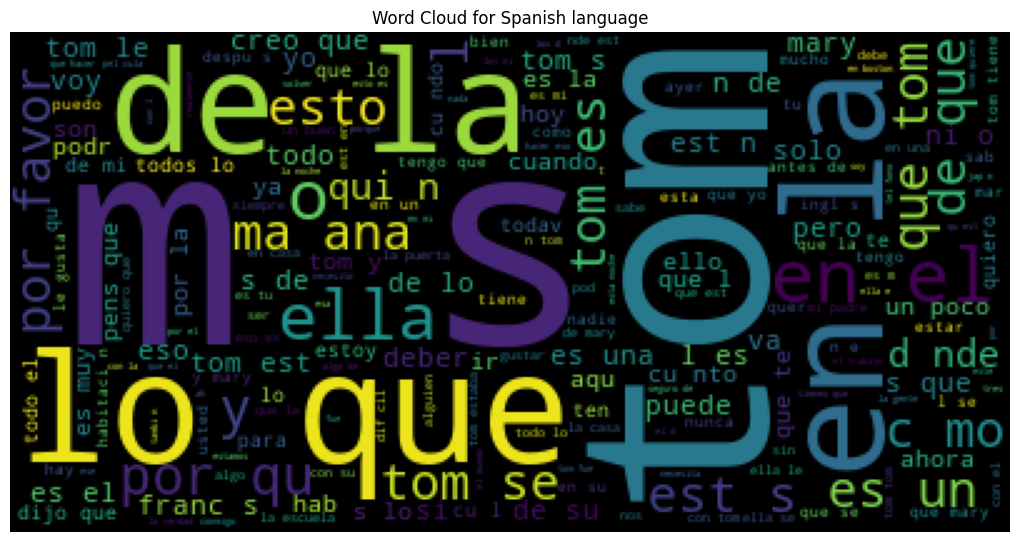

In [32]:
make_wordcloud(spanish_data,"Spanish")

In [33]:
## Dataset splitting ##

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [35]:
# splitting into independent and dependent variables
X=df['content']
Y=df['language']

In [37]:
# test-train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer=TfidfVectorizer(ngram_range=(1,4),analyzer='char')
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
def cnf_mtrx(tech,pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(Y_test, pred)

    # Create a heatmap of the confusion matrix using seaborn
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

    plt.yticks(rotation=0)

    # Set the axes labels and title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for'+" "+tech)

    # Display the plot
    plt.show()

<font size=6><b>Models<b></font>

<font size=4>1. Logistic Regression</font>

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
model_1=LogisticRegression(max_iter=900)
model_1.fit(X_train,Y_train)

LogisticRegression(max_iter=900)

In [184]:
pred_1=model_1.predict(X_test)
cr1=accuracy_score(Y_test,pred_1)
print(cr1*100)

99.8769126013998


In [185]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

     english       1.00      1.00      1.00     55295
      french       1.00      1.00      1.00     33701
      german       1.00      1.00      1.00     39914
     spanish       1.00      1.00      1.00     23827

    accuracy                           1.00    152737
   macro avg       1.00      1.00      1.00    152737
weighted avg       1.00      1.00      1.00    152737



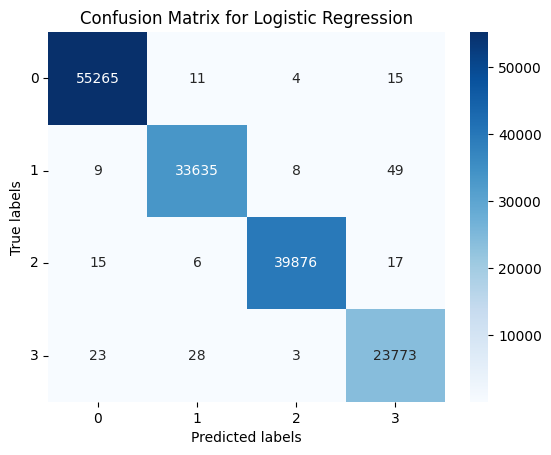

In [186]:
cnf_mtrx("Logistic Regression",pred_1)

<font size=4>2. Naive Bayes</font>

In [187]:
from sklearn.naive_bayes import MultinomialNB

In [188]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(Y_test, nb_pred)
print('Naive Bayes accuracy:', nb_acc)

Naive Bayes accuracy: 0.9972239863294421


In [189]:
print(classification_report(Y_test,nb_pred))

              precision    recall  f1-score   support

     english       1.00      1.00      1.00     55295
      french       1.00      1.00      1.00     33701
      german       1.00      1.00      1.00     39914
     spanish       0.99      1.00      0.99     23827

    accuracy                           1.00    152737
   macro avg       1.00      1.00      1.00    152737
weighted avg       1.00      1.00      1.00    152737



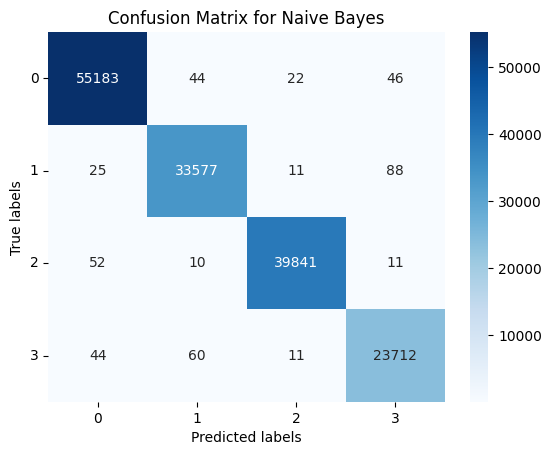

In [190]:
# Calculate the confusion matrix
cnf_mtrx("Naive Bayes",nb_pred)

<font size=4>3. Passive Aggressive Classifier</font>

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier(max_iter=500)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
pac_acc=accuracy_score(Y_test,y_pred)
print(pac_acc)

0.9994958654419034


In [23]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

     english       1.00      1.00      1.00     55295
      french       1.00      1.00      1.00     33701
      german       1.00      1.00      1.00     39914
     spanish       1.00      1.00      1.00     23827

    accuracy                           1.00    152737
   macro avg       1.00      1.00      1.00    152737
weighted avg       1.00      1.00      1.00    152737



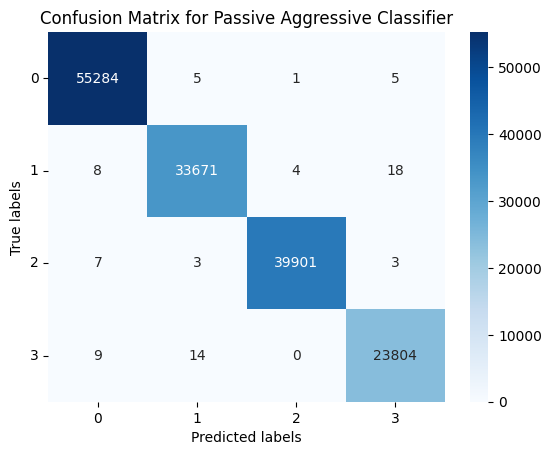

In [24]:
# Calculate the confusion matrix
cnf_mtrx("Passive Aggressive Classifier",y_pred)

<font size=4>4. Decision Tree</font>

In [192]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print(dt_acc)

0.9825713481343747


In [193]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

     english       0.99      0.99      0.99     55295
      french       0.98      0.98      0.98     33701
      german       0.99      0.99      0.99     39914
     spanish       0.97      0.97      0.97     23827

    accuracy                           0.98    152737
   macro avg       0.98      0.98      0.98    152737
weighted avg       0.98      0.98      0.98    152737



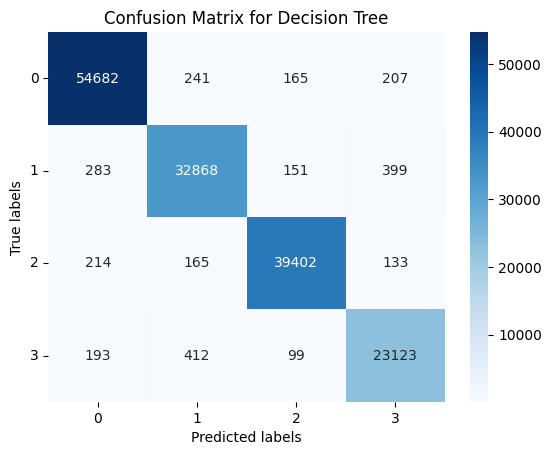

In [194]:
# Calculate the confusion matrix
cnf_mtrx("Decision Tree",dt_pred)

<font size=4>5. Random Forest</font>

In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print(rf_acc)

0.9981667834251032


In [20]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

     english       1.00      1.00      1.00     55295
      french       1.00      1.00      1.00     33701
      german       1.00      1.00      1.00     39914
     spanish       1.00      1.00      1.00     23827

    accuracy                           1.00    152737
   macro avg       1.00      1.00      1.00    152737
weighted avg       1.00      1.00      1.00    152737



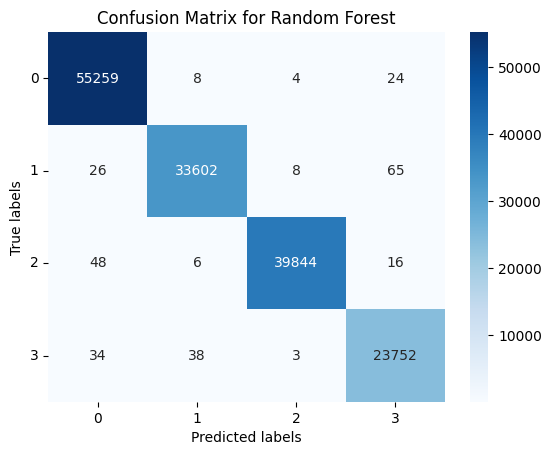

In [21]:
# Calculate the confusion matrix
cnf_mtrx("Random Forest",rf_pred)

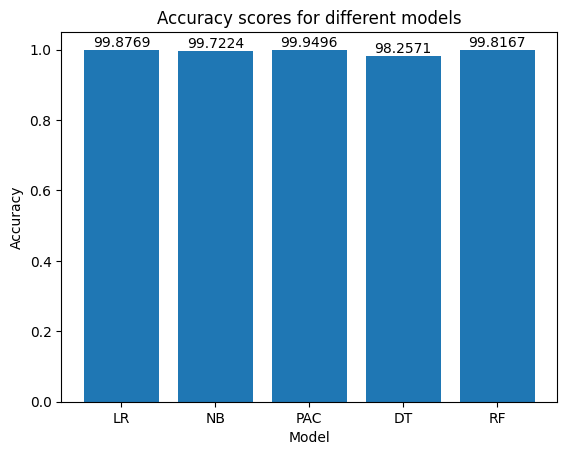

In [25]:
import matplotlib.pyplot as plt
dict_model={'LR':0.998769126013998,'NB':0.9972239863294421,'PAC':pac_acc,'DT':0.9825713481343747,'RF':rf_acc}
# Flatten the accuracy_scores list
plt.bar(dict_model.keys(), dict_model.values())
plt.title('Accuracy scores for different models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(dict_model.values()):
    plt.annotate("{0:.4f}".format(v*100), xy=(i, v), ha='center', va='bottom')
plt.show()

<font size=5><b>Clearly, PAC is the best model so using it for testing</b></font>

In [ ]:
## saving the best model
import pickle
model_path = 'pacModel.pkl'

# Open the file in binary mode
with open(model_path, 'wb') as file:
    pickle.dump(model, file)
    file.close()

In [14]:
## testing best ML model ##
def test(model,text):
    new_data=[text]
    new_data=vectorizer.transform(new_data)
    pred=model.predict(new_data)
    return pred[0]

In [ ]:
with open('pacModel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    file.close()

In [40]:
test(loaded_model,"English is a West Germanic language that is spoken by over 1.5 billion people around the world")

'english'

In [41]:
test(loaded_model,"El español es un idioma romance que se habla en muchos países alrededor del mundo")

'spanish'

In [42]:
test(loaded_model,"La France est un pays situé en Europe de l'Ouest.")

'french'

In [43]:
test(loaded_model,"Deutschland ist ein Land in Mitteleuropa.")

'german'